In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
temperatures = []

# Open the output file and captur the informartion regarding cities. 
with open(output_data_file, "w", encoding="utf8", newline="\n") as city_file:
    writer = csv.writer(city_file, delimiter=',')
    
    for city in cities:
        # Build query URL based on current element in units
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=Imperial"                    
    
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        if weather_json["cod"] != "404":
            # Get Longitude, latitude, temperature, humidity, cloudiness and wndspeed from JSON response
            country = weather_json["sys"]["country"]
            longitude = weather_json["coord"]["lon"] 
            latitude = weather_json["coord"]["lat"]
            temperature = weather_json["main"]["temp_max"]
            temperatures.append(temperature)
            humidity =  weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            windspeed = weather_json["wind"]["speed"]
            tdate= weather_json["dt"]
            data=[city, country, temperatures[0], longitude, latitude, tdate, humidity, cloudiness, windspeed]
            writer.writerow(data)
            temperatures = []
        else: 
            print("City:", city,  "Temperature not found")


City: taolanaro Temperature not found
City: saleaula Temperature not found
City: barentsburg Temperature not found
City: gurgan Temperature not found
City: illoqqortoormiut Temperature not found
City: bengkulu Temperature not found
City: olafsvik Temperature not found
City: nizhneyansk Temperature not found
City: asfi Temperature not found
City: formoso do araguaia Temperature not found
City: mys shmidta Temperature not found
City: duz Temperature not found
City: belushya guba Temperature not found
City: odweyne Temperature not found
City: gizeh Temperature not found
City: amderma Temperature not found
City: samalaeulu Temperature not found
City: vaitupu Temperature not found
City: umzimvubu Temperature not found
City: andevoranto Temperature not found
City: samusu Temperature not found
City: yanchukan Temperature not found
City: kuche Temperature not found
City: grand centre Temperature not found
City: sentyabrskiy Temperature not found
City: camana Temperature not found
City: chore T

## Read the CSV file and Convert to a Data Frame


In [4]:
city_weather_load = output_data_file
df = pd.read_csv(city_weather_load, names = ['city', 'country', 'temperatures', 'longitude', 'latitude', 'date', 'humidity', 
                                                      'cloudiness', 'windspeed'])
df

,city,country,temperatures,longitude,latitude,date,humidity,cloudiness,windspeed
0,mataura,NZ,34.38,168.86,-46.19,1533838064,85,8,5.95
1,ushuaia,AR,46.40,-68.31,-54.81,1533837600,61,40,16.11
2,shenzhen,CN,86.00,114.05,22.54,1533837600,74,40,13.87
3,vaini,IN,67.50,74.49,15.34,1533838065,100,100,4.61
4,ganzhou,CN,75.87,114.93,25.86,1533838065,99,32,1.70
5,jamestown,AU,53.37,138.60,-33.21,1533838066,48,0,21.27
6,new norfolk,AU,51.80,147.06,-42.78,1533835800,66,75,14.99
7,hilo,US,75.20,-155.08,19.71,1533833760,88,40,4.70
8,bluff,AU,40.86,149.07,-23.58,1533838067,82,0,3.04
9,banda aceh,ID,76.95,95.32,5.56,1533838067,89,48,4.72


## Generate Scatter Plots 


Text(0.5,1,'City Latitude Vs Temperature')

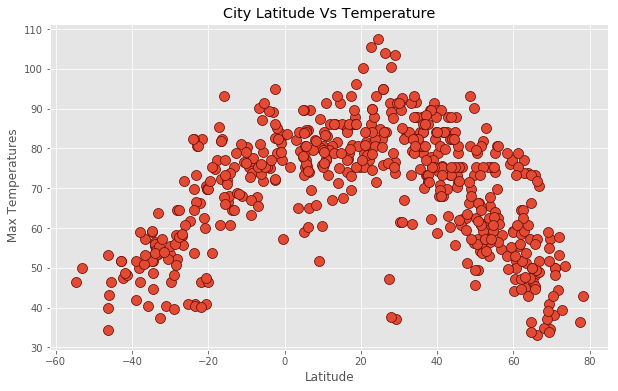

In [5]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
    df["latitude"], # X values
    df["temperatures"], # Y Values
    s=100, #increase the size the plot bubble
    cmap=plt.cm.Reds, #type of color(colormap=gradient)
    vmin=0, #lowee end of color gradient
    edgecolor="#6b0c08", #edge line color
    linewidth=0.75 #edge line widths
)
#cbar = fig.colorbar(my_scatter_plot)
#cbar.set_label('Temperature change based on Latitude of City')
ax.set_xlabel("Latitude")
ax.set_ylabel(" Max Temperatures")
ax.set_title("City Latitude Vs Temperature")

Observation: The graph currently shows that the temperature rises (becomes hotter) when we move from South to North. The shape is dipicted in form of a parabola. Also one point to be noted is the South pole is colder than the north pole. 

Text(0.5,1,'City Latitude Vs Humidity')

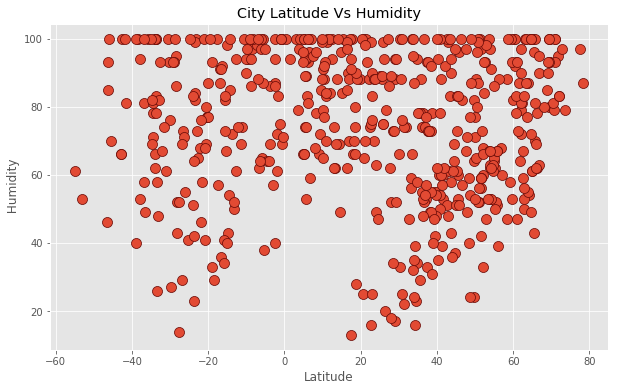

In [6]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,6)
my_scatter_plot = ax.scatter(
    df["latitude"], # X values
    df["humidity"], # Y Values
    s=100, #increase the size the plot bubble
    cmap=plt.cm.Reds, #type of color(colormap=gradient)
    edgecolor="#6b0c08", #edge line color
    linewidth=0.75 #edge line widths
)
ax.set_xlabel("Latitude")
ax.set_ylabel(" Humidity")
ax.set_title("City Latitude Vs Humidity")

Observation: There is no corelation between the Humidity and the lattitude as the plots do not diplict any shape. 

Text(0.5,1,'City Latitude Vs Cloudiness')

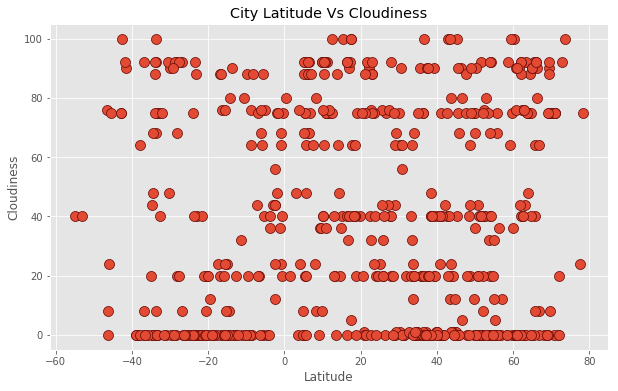

In [7]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
    df["latitude"], # X values
    df["cloudiness"], # Y Values
    s=100, #increase the size the plot bubble
    cmap=plt.cm.Reds, #type of color(colormap=gradient)
    edgecolor="#6b0c08", #edge line color
    linewidth=0.75 #edge line widths
)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")
ax.set_title("City Latitude Vs Cloudiness")

Observation: There is no corelation between the Cloudiness and the lattitude as the plots do not diplict any shape. cloudiness is pretty much uniform for places on the same latitude.

Text(0.5,1,'City Latitude Vs Windspeed')

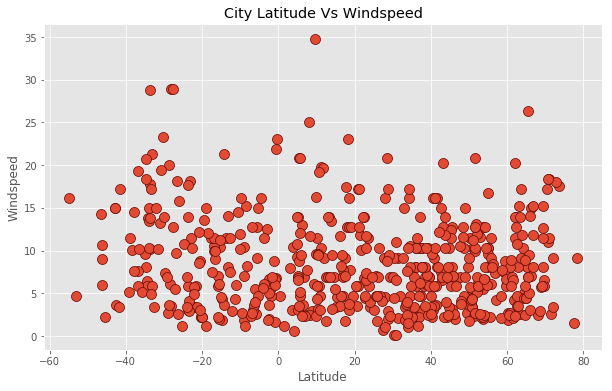

In [8]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
my_scatter_plot = ax.scatter(
    df["latitude"], # X values
    df["windspeed"], # Y Values
    s=100, #increase the size the plot bubble
    cmap=plt.cm.Reds, #type of color(colormap=gradient)
    edgecolor="#6b0c08", #edge line color
    linewidth=0.75 #edge line widths
)
ax.set_xlabel("Latitude")
ax.set_ylabel("Windspeed")
ax.set_title("City Latitude Vs Windspeed")

Observation: There is no corelation between the Windspeed and the lattitude as the plots do not diplict any shape. The windspeed is uniform for the places in the same latitude. 